<a href="https://colab.research.google.com/github/MiMghtt/API_de_CEP/blob/main/Michel_Douglas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install gcsfs

In [ ]:
pip install pymongo

In [ ]:
pip install pandera

In [ ]:
import pandas as pd
import os
import numpy as np
from google.cloud import storage
import pandera as pa
from pymongo import MongoClient

In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
uri = "mongodb+srv://clusterestudo01.bqobbjb.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = MongoClient(uri,tls=True,tlsCertificateKeyFile='/content/X509-cert-1897606538615920079.pem',)

In [ ]:
#CONFIGURANDO DA CHAVE DE SEGURANCA (Enviada com o projeto)

serviceAccount = '/content/skilled-tuner-377718-d0f09fa321c0.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
#Configurações Google Cloud Storage
client = storage.Client()
bucket = client.get_bucket('michelmarighetti')
bucket.blob('marketing_campaign.csv')
path = 'gs://michelmarighetti/brutos/marketing_campaign.csv'

In [ ]:
df = pd.read_csv(path,sep=',',encoding='ISO-8859-1')


In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [ ]:
db = client ['Brutomar']
collection = db['marketing']


TypeError: ignored

In [ ]:
doc_count = collection.count_documents({})
print(doc_count)

0


In [ ]:
df_dict= df.to_dict("records")
collection.insert_many(df_dict)

In [ ]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [ ]:
#Renomeando os nomes das colunas para PT-BR
df.rename(columns={'Year_Birth' : 'nascimento',
                   'Marital_Status' : 'estado_civil',
                   'Education' : 'escolaridade',
                   'Income' : 'renda',
                   'Kidhome' : 'criancas_em_casa',
                   'Teenhome' : 'adolescentes_em_casa',
                   'Dt_Customer' : 'data_cliente',
                   'Recency' : 'atualidade',
                   'Recency' :  'recencia',
                   'MntWines' : 'n_vinhos',
                   'MntFruits' : 'frutas',
                   'MntMeatProducts' : 'produtos_carne',
                   'MntFishProducts' : 'produtos_peixe',
                   'MntSweetProducts' : 'produtos_doces', 
                   'MntGoldProds' : 'produtos_ouro',
                   'NumDealsPurchases' : 'ofertas_de_compra',
                   'NumWebPurchases' : 'compras_online',
                   'NumCatalogPurchases' : 'catalogos_de_compra',
                   'NumStorePurchases' : 'compras_na_loja',
                   'NumWebVisitsMonth' : 'qtd_visitas_online_mes',
                   'AcceptedCmp1' : 'campanha_1',
                   'AcceptedCmp2' : 'campanha_2',
                   'AcceptedCmp3' : 'campanha_3',
                   'AcceptedCmp4' : 'campanha_4',
                   'AcceptedCmp5' : 'campanha_5',
                   'Complain' : 'reclamacao',
                   'Z_CostContact' : 'custo_de_contado',
                   'Z_Revenue' : 'rendimento',
                   'Response' : 'resposta'}, inplace=True)

In [ ]:
df.drop(['rendimento', 'custo_de_contado'], axis=1, inplace=True)

'''
Colunas foram dropadas por terem o mesmo valor e de acorodo com a nossa analise elas não tiverram nenhum impacto
'''

'\nColunas foram dropadas por terem o mesmo valor e de acorodo com a nossa analise elas não tiverram nenhum impacto\n'

In [ ]:
#Renomeando valores da coluna
df['estado_civil'].replace({'Single' : 'Solteiro', 'Together' : 'União estável', 'Married' : 'Casado', 'Divorced' : 'Divorciado', 'Widow' : 'Viuvo', 'Alone' : 'Inconsistente', 'Absurd' : 'Inconsistente', 'YOLO':'Inconsistente'}, inplace=True)
df['escolaridade'].replace({'Graduation' : 'Graduação', 'Master' : 'Mestrado', 'Basic' : 'Básico', '2n Cycle' : 'Segundo ciclo', 'PhD' : 'Doutorado'}, inplace=True)


In [ ]:
#Convertendo a coluna data_cliente de object para datetime
df['data_cliente'] = pd.to_datetime(df['data_cliente'])

In [ ]:
df = df[['ID','nascimento', 'escolaridade', 'estado_civil','renda', 'criancas_em_casa', 'adolescentes_em_casa', 'data_cliente', 'recencia', 'n_vinhos', 'frutas', 'produtos_carne', 'produtos_peixe','produtos_doces', 'produtos_ouro','ofertas_de_compra', 'compras_online', 'catalogos_de_compra', 'compras_na_loja','qtd_visitas_online_mes','campanha_1','campanha_2', 'campanha_3','campanha_4','campanha_5','reclamacao', 'resposta']]

In [ ]:
df

,ID,nascimento,escolaridade,estado_civil,renda,criancas_em_casa,adolescentes_em_casa,data_cliente,recencia,n_vinhos,frutas,produtos_carne,produtos_peixe,produtos_doces,produtos_ouro,ofertas_de_compra,compras_online,catalogos_de_compra,compras_na_loja,qtd_visitas_online_mes,campanha_1,campanha_2,campanha_3,campanha_4,campanha_5,reclamacao,resposta
0,5524,1957,Graduação,Solteiro,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduação,Solteiro,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduação,União estável,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduação,União estável,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,Doutorado,Casado,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduação,Casado,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,Doutorado,União estável,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,1,0,0,0,0,0,0
2237,7270,1981,Graduação,Divorciado,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,0,0,1,0,0,0
2238,8235,1956,Mestrado,União estável,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [ ]:
df.loc[df.reclamacao == 1, ['reclamacao']]= 'Sim'
df.loc[df.reclamacao == 0, ['reclamacao']]= 'Não'
df.loc[df.campanha_3 == 1, ['campanha_3']]= 'Sim'
df.loc[df.campanha_3 == 0, ['campanha_3']]= 'Não'
df.loc[df.campanha_4 == 0, ['campanha_4']]= 'Não'
df.loc[df.campanha_4 == 1, ['campanha_4']]= 'Sim'
df.loc[df.campanha_5 == 1, ['campanha_5']]= 'Sim'
df.loc[df.campanha_5 == 0, ['campanha_5']]= 'Não'
df.loc[df.campanha_1 == 0, ['campanha_1']]= 'Não'
df.loc[df.campanha_1 == 1, ['campanha_1']]= 'Sim'
df.loc[df.campanha_2 == 0, ['campanha_2']]= 'Não'
df.loc[df.campanha_2 == 1, ['campanha_2']]= 'Sim'




In [ ]:
#Verificando o tipo das colunas após as correções
df.dtypes

ID                                 int64
nascimento                         int64
escolaridade                      object
estado_civil                      object
renda                            float64
criancas_em_casa                   int64
adolescentes_em_casa               int64
data_cliente              datetime64[ns]
recencia                           int64
n_vinhos                           int64
frutas                             int64
produtos_carne                     int64
produtos_peixe                     int64
produtos_doces                     int64
produtos_ouro                      int64
ofertas_de_compra                  int64
compras_online                     int64
catalogos_de_compra                int64
compras_na_loja                    int64
qtd_visitas_online_mes             int64
campanha_1                        object
campanha_2                        object
campanha_3                        object
campanha_4                        object
campanha_5      

#Análises numéricas:

In [ ]:
#Filtro para somar a quantidade de pessoas se filho
filtro_sem_filho = (df.adolescentes_em_casa == 0) & (df.criancas_em_casa == 0)
sem = filtro_sem_filho.sum()

In [ ]:
#Filtro para saber se existe mais clientes sem filhos ou com filhos
filtro_com_filho = (df.adolescentes_em_casa >= 1) | (df.criancas_em_casa >= 1)
com = filtro_com_filho.sum()


In [ ]:
#Criando uma tabela para visualizar a quantidade de clientes com filhos e sem filhos
filhos = [['Com filhos', com],
           ['Sem filhos', sem]]

df_filhos = pd.DataFrame(filhos, columns=['Filhos', 'Quantidade_de_filhos'])

In [ ]:
#Printando a tabela para verificação de clientes com filhos e sem filhos
df_filhos

,Filhos,Quantidade_de_filhos
0,Com filhos,1602
1,Sem filhos,638


In [ ]:
#Filtros de estado civil 
filtro_solteiro = df['estado_civil'] == 'Solteiro' 
filtro_uniao = df['estado_civil'] == 'União estável'
filtro_casado = df['estado_civil'] == 'Casado'
filtro_divorciado = df['estado_civil'] == 'Divorciado'
filtro_viuvo = df['estado_civil'] == 'Viuvo'
filtro_Inconsistente = df['estado_civil'] == 'Inconsistente'

In [ ]:
#somando a quantidade de pessoas de acordo com seu estado civil
Solteiros = filtro_solteiro.sum()
Uniao_estavel = filtro_uniao.sum()
Casados = filtro_casado.sum()
Divorciados = filtro_divorciado.sum()
Viuvos = filtro_viuvo.sum()
Inconsistente = filtro_Inconsistente.sum()

In [ ]:
#Criando uma tabela para visualizar a quantidade de clientes com filhos e sem filhos
estadocivil = [['Solteiros', Solteiros],
               ['Uniao_estavel', Uniao_estavel],
               ['Casados', Casados],
               ['Divorciados', Divorciados],
               ['Viuvos', Viuvos],
               ['Inconsistente',Inconsistente]]

df_estadocivil = pd.DataFrame(estadocivil, columns=['Estado_civil', 'Quantidade'])

In [ ]:
#Printando a tabela para visualização de quantidade de clientes por estado civil
df_estadocivil

,Estado_civil,Quantidade
0,Solteiros,480
1,Uniao_estavel,580
2,Casados,864
3,Divorciados,232
4,Viuvos,77
5,Inconsistente,7


In [ ]:
#Criando filtros para cada tipo de escolaridade
filtro_graduacao = df['escolaridade'] == 'Graduação' 
filtro_doutorado = df['escolaridade'] == 'Doutorado'
filtro_mestrado = df['escolaridade'] == 'Mestrado'
filtro_basico = df['escolaridade'] == 'Básico'
filtro_segundo = df['escolaridade'] == 'Segundo ciclo'

In [ ]:
#Somando a quantidade de cliente de acordo com a escolaridade
graduacao = filtro_graduacao.sum()
doutorado = filtro_doutorado.sum()
mestrado = filtro_mestrado.sum()
basico = filtro_basico.sum()
segundo = filtro_segundo.sum()

In [ ]:
#Criando uma tabela para visualizar a quantidade de clientes por escolaridade
escolaridade = [['Graduação', graduacao],
               ['Doutorado', doutorado],
               ['Mestrado', mestrado],
               ['Básico', basico],
               ['Segundo ciclo', segundo]]

df_escolaridade = pd.DataFrame(escolaridade, columns=['Escolaridade', 'Quantidade'])

In [ ]:
#Printando tabela para visualizar a quantidade de clientes por escolaridade
df_escolaridade

,Escolaridade,Quantidade
0,Graduação,1127
1,Doutorado,486
2,Mestrado,370
3,Básico,54
4,Segundo ciclo,203


In [ ]:
#Criando um novo dataframe relacionando pessoas com filho e casadas
df2 = df.loc[filtro_com_filho & filtro_casado]
df2.drop(['criancas_em_casa', 'adolescentes_em_casa'], axis=1, inplace=True)


/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
#Retirando valores NaN da analise de renda
df2.dropna(subset=['renda'], inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
#Printando o dataframe de casados ordenado pela renda
df2.sort_values('renda', ascending=False)


,ID,nascimento,escolaridade,estado_civil,renda,data_cliente,recencia,n_vinhos,frutas,produtos_carne,produtos_peixe,produtos_doces,produtos_ouro,ofertas_de_compra,compras_online,catalogos_de_compra,compras_na_loja,qtd_visitas_online_mes,campanha_1,campanha_2,campanha_3,campanha_4,campanha_5,reclamacao,resposta
164,8475,1973,Doutorado,Casado,157243.0,2014-01-03,98,20,2,1582,1,2,1,15,0,22,0,0,Não,Não,Não,Não,Não,Não,0
1473,4070,1969,Doutorado,Casado,94871.0,2012-01-09,99,169,24,553,188,0,144,1,8,5,4,7,Não,Não,Não,Sim,Sim,Não,1
826,9499,1954,Graduação,Casado,93404.0,2013-07-05,97,1279,15,287,20,0,15,3,3,4,7,5,Não,Não,Não,Sim,Sim,Não,0
1334,2535,1978,Mestrado,Casado,88097.0,2012-08-18,24,163,0,480,0,126,75,1,6,5,8,9,Sim,Não,Não,Sim,Sim,Não,1
1947,2495,1974,Mestrado,Casado,83891.0,2014-06-20,24,217,38,350,111,85,15,1,4,7,10,1,Não,Não,Não,Não,Não,Não,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,10710,1979,Graduação,Casado,7500.0,2012-08-29,61,5,2,3,3,0,5,1,1,0,2,8,Não,Não,Não,Não,Não,Não,0
2214,9303,1976,Graduação,Casado,5305.0,2013-07-30,12,12,4,7,1,3,5,0,1,0,0,13,Não,Não,Não,Não,Não,Não,0
1975,10311,1969,Graduação,Casado,4428.0,2013-05-10,0,16,4,12,2,4,321,0,25,0,0,1,Não,Não,Não,Não,Não,Não,0
1846,9931,1963,Doutorado,Casado,4023.0,2014-06-23,29,5,0,1,1,1,1,15,0,0,0,19,Não,Não,Não,Não,Não,Não,0


In [ ]:
#Criando dataframe relacionando solteiros sme filho
df3 =  df[filtro_sem_filho & filtro_solteiro]
df3.drop(['criancas_em_casa', 'adolescentes_em_casa'], axis=1, inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
#Retirando valores NaN da analise de renda
df3.dropna(subset=['renda'], inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
#Printando o dataframe ordenado pela renda
df3.sort_values('renda', ascending=False)

,ID,nascimento,escolaridade,estado_civil,renda,data_cliente,recencia,n_vinhos,frutas,produtos_carne,produtos_peixe,produtos_doces,produtos_ouro,ofertas_de_compra,compras_online,catalogos_de_compra,compras_na_loja,qtd_visitas_online_mes,campanha_1,campanha_2,campanha_3,campanha_4,campanha_5,reclamacao,resposta
1898,4619,1945,Doutorado,Solteiro,113734.0,2014-05-28,9,6,2,3,1,262,3,0,27,0,0,1,Não,Não,Não,Não,Não,Não,0
124,7215,1983,Graduação,Solteiro,101970.0,2013-12-03,69,722,27,102,44,72,168,0,6,8,13,2,Sim,Não,Não,Sim,Sim,Não,1
1113,7451,1960,Mestrado,Solteiro,98777.0,2014-02-17,23,1000,19,711,125,115,38,0,4,6,9,1,Não,Não,Não,Sim,Não,Não,0
650,4248,1960,Mestrado,Solteiro,98777.0,2014-02-17,23,1000,19,711,125,115,38,0,4,6,9,1,Não,Não,Não,Sim,Não,Não,0
1958,2109,1990,Graduação,Solteiro,96843.0,2013-04-23,60,448,71,951,40,17,17,1,6,11,10,2,Não,Não,Não,Não,Sim,Não,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,8977,1985,Básico,Solteiro,16581.0,2013-12-01,51,1,3,4,2,3,11,1,0,0,3,4,Não,Não,Não,Não,Não,Não,0
233,9617,1951,Graduação,Solteiro,15033.0,2014-04-16,37,0,4,5,6,0,4,1,1,0,3,3,Não,Não,Não,Não,Não,Não,0
944,8700,1986,Básico,Solteiro,14906.0,2012-12-22,86,7,7,14,7,16,15,3,2,1,3,7,Não,Não,Não,Não,Não,Não,0
1042,10749,1991,Graduação,Solteiro,8028.0,2012-09-18,62,73,18,66,7,12,2,15,0,1,0,19,Não,Não,Não,Não,Não,Não,0


In [ ]:
df = df.copy()

In [ ]:
df01 = df.copy()


In [ ]:
df01.drop(['data_cliente','recencia', 'produtos_carne', 'frutas', 'produtos_peixe', 'produtos_doces', 'produtos_ouro','ofertas_de_compra', 'compras_online', 'catalogos_de_compra', 'compras_na_loja', 'qtd_visitas_online_mes', 'campanha_3', 'campanha_4', 'campanha_5', 'campanha_1', 'campanha_2', 'reclamacao', 'resposta'], axis=1, inplace=True)
'''
Esse drop foi realizado apenas para seguir aditande com afunilamento
'''

'\nEsse drop foi realizado apenas para seguir aditande com afunilamento\n'

In [ ]:
df01

,ID,nascimento,escolaridade,estado_civil,renda,criancas_em_casa,adolescentes_em_casa,n_vinhos
0,5524,1957,Graduação,Solteiro,58138.0,0,0,635
1,2174,1954,Graduação,Solteiro,46344.0,1,1,11
2,4141,1965,Graduação,União estável,71613.0,0,0,426
3,6182,1984,Graduação,União estável,26646.0,1,0,11
4,5324,1981,Doutorado,Casado,58293.0,1,0,173
...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduação,Casado,61223.0,0,1,709
2236,4001,1946,Doutorado,União estável,64014.0,2,1,406
2237,7270,1981,Graduação,Divorciado,56981.0,0,0,908
2238,8235,1956,Mestrado,União estável,69245.0,0,1,428


In [ ]:
df01

,ID,nascimento,escolaridade,estado_civil,renda,criancas_em_casa,adolescentes_em_casa,n_vinhos
0,5524,1957,Graduação,Solteiro,58138.0,0,0,635
1,2174,1954,Graduação,Solteiro,46344.0,1,1,11
2,4141,1965,Graduação,União estável,71613.0,0,0,426
3,6182,1984,Graduação,União estável,26646.0,1,0,11
4,5324,1981,Doutorado,Casado,58293.0,1,0,173
...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduação,Casado,61223.0,0,1,709
2236,4001,1946,Doutorado,União estável,64014.0,2,1,406
2237,7270,1981,Graduação,Divorciado,56981.0,0,0,908
2238,8235,1956,Mestrado,União estável,69245.0,0,1,428


In [ ]:
df01.groupby(['escolaridade', "estado_civil"])['n_vinhos'].sum()
'''
Nestá analise teve o intuito de observar o nivel de escolaridade 
com os sub-grupos do estado civl de cada participante visando observa a 
quantidade que cada subgrupo compravam em garrafas de vinho
'''

'\nNestá analise teve o intuito de observar o nivel de escolaridade \ncom os sub-grupos do estado civl de cada participante visando observa a \nquantidade que cada subgrupo compravam em garrafas de vinho\n'

#Análises gráficas:

<AxesSubplot:xlabel='Situação da União', ylabel='Quantidade'>

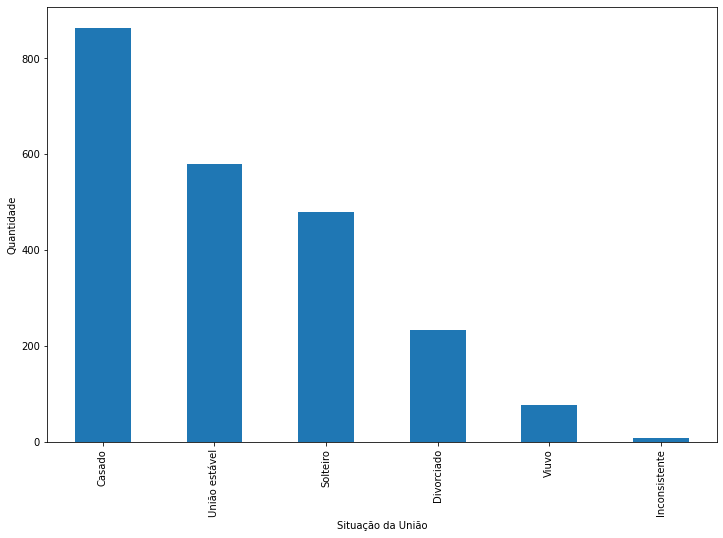

In [ ]:
#Gráfico para visualizar estado civil dos clientes
df.groupby(['estado_civil'],dropna=False).size().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Situação da União',ylabel='Quantidade')


<AxesSubplot:xlabel='Escolaridade', ylabel='Quantide'>

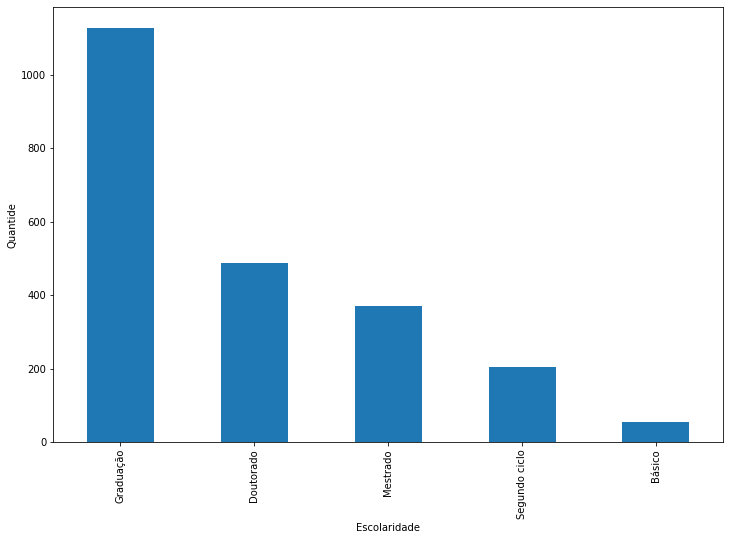

In [ ]:
 #Gráfico para visualizar a escolaridade dos clientes
 df.groupby(['escolaridade'],dropna=False).size().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Escolaridade',ylabel='Quantide')


<AxesSubplot:ylabel='None'>

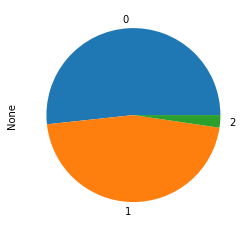

In [ ]:
#Gráfico para visualizar a quantidade de adolescentes em casa
df.groupby('adolescentes_em_casa',dropna=False).size().sort_values(ascending=False).plot.pie()


<AxesSubplot:ylabel='None'>

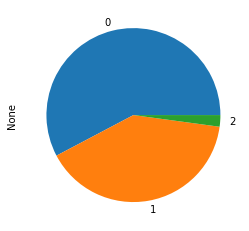

In [ ]:
#Gráfico para visualizar a quantidade de adolescentes em casa
df.groupby('criancas_em_casa',dropna=False).size().sort_values(ascending=False).plot.pie()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
correlacao = df.corr()
correlacao

,ID,nascimento,renda,criancas_em_casa,adolescentes_em_casa,recencia,n_vinhos,frutas,produtos_carne,produtos_peixe,produtos_doces,produtos_ouro,ofertas_de_compra,compras_online,catalogos_de_compra,compras_na_loja,qtd_visitas_online_mes,resposta
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,-0.013438,-0.037166,-0.018924,-0.003440,-0.014927,-0.007446,-0.021968
nascimento,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.060846,-0.145040,-0.121275,-0.128272,0.121139,0.021325
renda,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,0.133047
criancas_em_casa,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,-0.080008
adolescentes_em_casa,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.154446
recencia,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.198437
n_vinhos,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.247254
frutas,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.125289
produtos_carne,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.236335
produtos_peixe,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.111331


<AxesSubplot:>

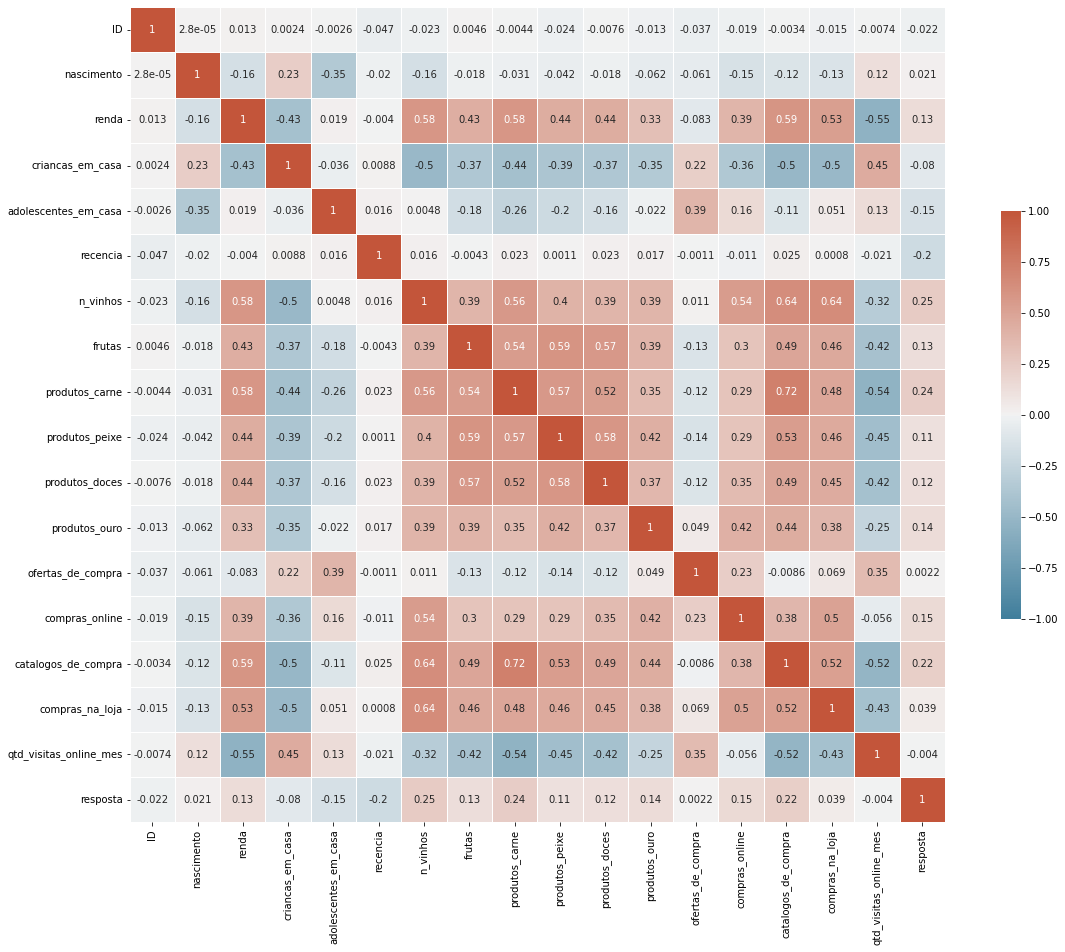

In [ ]:
plt.figure(figsize=(20, 15))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(correlacao, cmap=cmap, center=0, vmin=-1, vmax=1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#Heatmap 

###É um gráfico de calor, que faz um relacionamento entre 2 colunas. O resultados são de 1 a -1, onde 1 significa uma forte relação e -1 uma fraca relação. Quando a relação se aproxima ao coeficiente zero, quer dizer que as duas colunas não tem relação alguma.


#Alguns insights do heatmap:

####A quantidade de visitas online por mês tem uma relação mais positiva apenas com ofertas de compras e crianças em casa. Isso indica que o crescimento de visitas online se deve as ofertas de compra e o publico alvo é majoritariamente pessoas com crianças em casa. 
####->(+Ofertas de produtos infatis)

####A quantidade de visitas online por mês tem uma relação extremamente fraca para pessoas que compram na loja. 
####->(Interessante propor campanha de desconto para clientes que baixam os aplicativos e consomes os cupons disponibilizados no app)

####A quantidade de vendas de vinho é maior para clientes com uma renda maior. Também há uma forte relação entre pessoas que consomem vinhos e carnes. A maioria das pessoas compram esses 3 produtos direto na loja 
####->(Arurmar a disposição da loja agrupando esses 3 itens perto)


In [ ]:
db2 = client ['TradadosMar']
collection = db2['TradadosMarketing']


In [ ]:
doc_count = collection.count_documents({})
print(doc_count)


0


In [ ]:
df_dict= df.to_dict("records")
collection.insert_many(df_dict)
